In [ ]:
# import libraries
from google.colab import drive
import keras
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/flowers/flowers'
flowers_class = ['daisy', 'rose']

## Data visualization

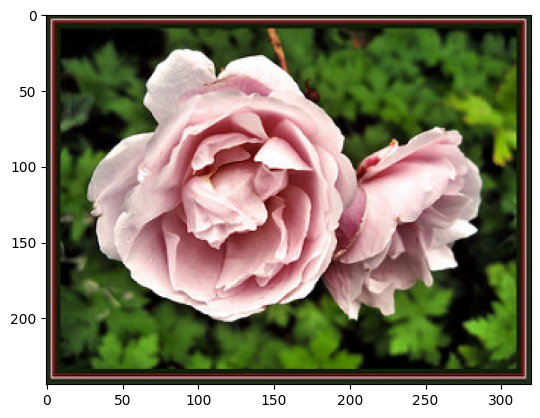

In [ ]:
# visuals of image
flower_path = os.path.join(dir_path, flowers_class[1], '*')
flower_path = glob.glob(flower_path)
image = io.imread(flower_path[10])
plt.imshow(image)
plt.show()

In [ ]:
image.shape

(244, 320, 3)

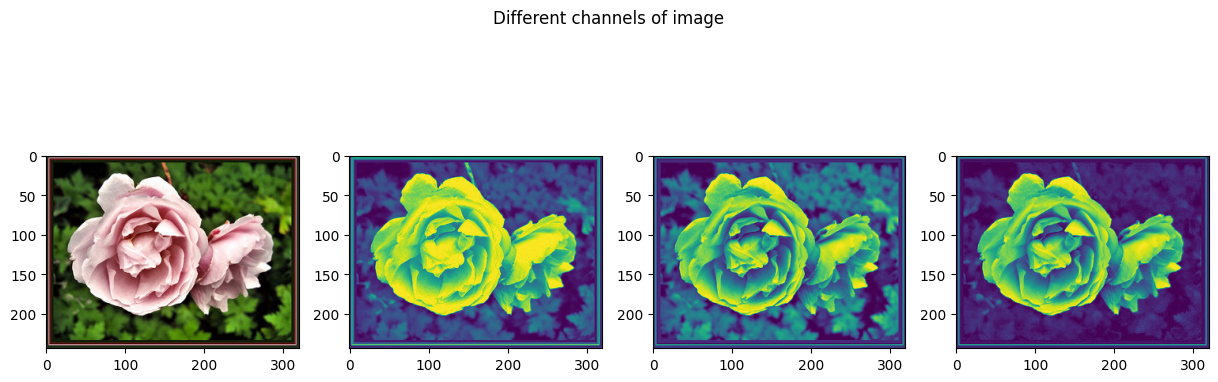

In [ ]:
# visuals of various channels of image
f, axes = plt.subplots(1, 4, figsize=(15,5))
axes[0].imshow(image)
axes[1].imshow(image[:, :, 0])
axes[2].imshow(image[:, :, 1])
axes[3].imshow(image[:, :, 2])
f.suptitle('Different channels of image')
plt.show()

## Morphological transformation

1. **Thresholding**: Convert RGB image to gray scale image. Set threshold, intensity above is 1 and below is 0.

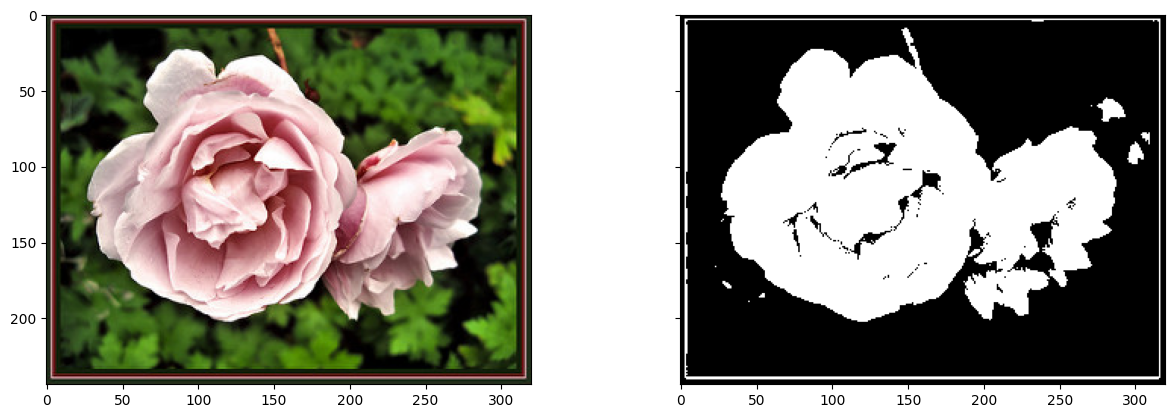

In [ ]:
# thresholding
bin_image = image[:, :, 0] > 127
plot_image([image, bin_image], cmap='gray')
plt.show()

**2. Erosion, Dilation, Opening & Closing**

- **Erosion** shrinks bright regions and enlarges dark regions.

- **Dilation** on the other hand is exact opposite side - it shrinks dark regions and enlarges the bright regions.

- **Opening** is erosion followed by dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.

- **Closing** is dilation followed by erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features.

All these can be done using the `skimage.morphology` module. The basic idea is to have a circular disk of a certain size (3 below) move around the image and apply these transformations using it.

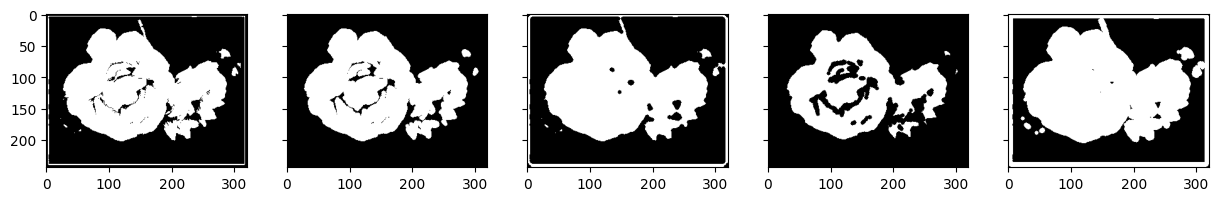

In [ ]:
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import disk

# use a disk of radius 3
selem = disk(3)

# oprning and closing
open_img = binary_opening(bin_image, selem)
close_img = binary_closing(bin_image, selem)

# erosion and dilation
eroded_img = binary_erosion(bin_image, selem)
dilated_img = binary_dilation(bin_image, selem)

plot_image([bin_image, open_img, close_img, eroded_img, dilated_img], cmap='gray')

**3. Normalization**

Normalisation is the most crucial step in the pre-processing part. There are multiple ways to normalise images which we will be talking about.

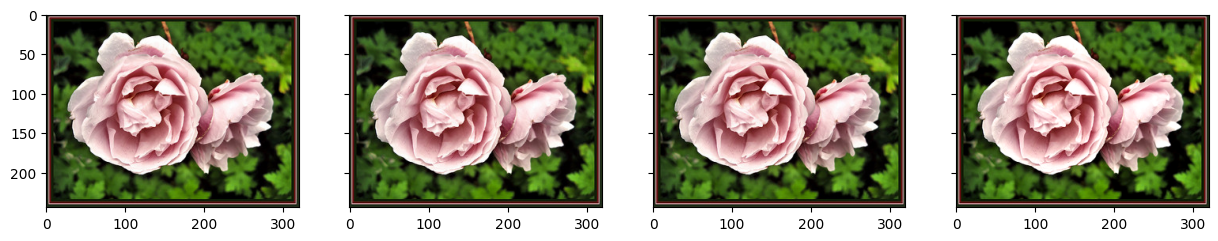

In [ ]:
norm1_image = image/255
norm2_image = (image - np.min(image))/(np.max(image) - np.min(image))
norm3_image = (image - np.percentile(image,5))/ (np.percentile(image,95) - np.percentile(image,5))

plot_image([image, norm1_image, norm2_image, norm3_image], cmap='gray')

**4. Augmentations**

There are multiple types of augmentations possible. The basic ones transform the original image using one of the following types of transformations:

- Linear transformations
- Affine transformations

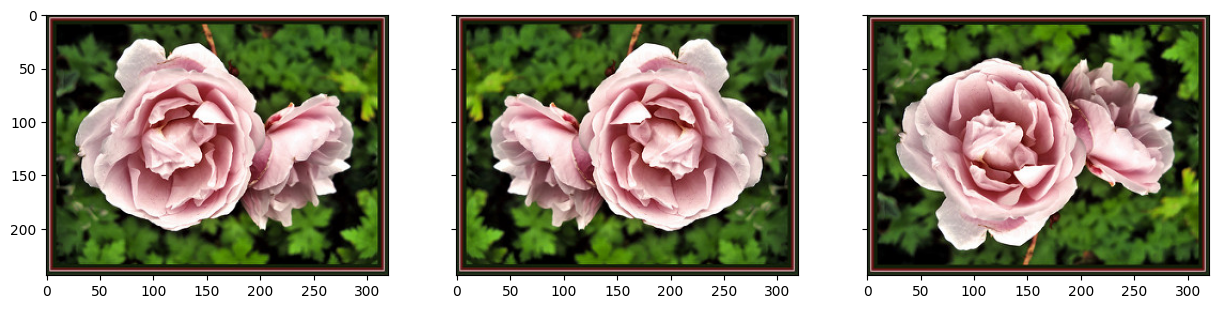

In [ ]:
# linear transformations

from skimage import transform

# flip left-right, up-down
image_flipr = np.fliplr(image)
image_flipud = np.flipud(image)

plot_image([image, image_flipr, image_flipud])

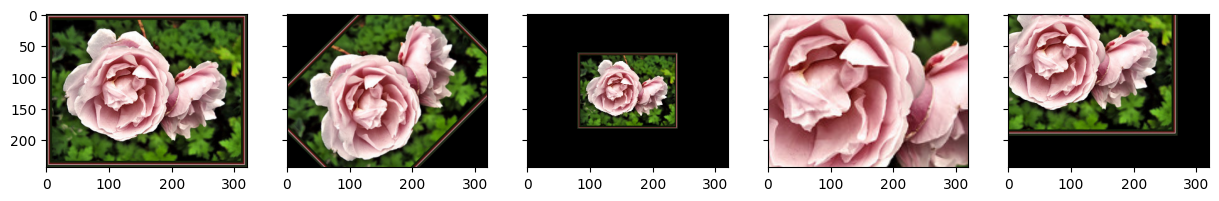

In [ ]:
# affine transformations

# specify x and y coordinates to be used for shifting (mid points)
shift_x, shift_y = image.shape[1]/2, image.shape[0]/2

# translation by certain units
matrix_to_topleft = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
matrix_to_center = transform.SimilarityTransform(translation=[shift_x, shift_y])

# rotation
rot_transforms =  transform.AffineTransform(rotation=np.deg2rad(45))
rot_matrix = matrix_to_topleft + rot_transforms + matrix_to_center
rot_image = transform.warp(image, rot_matrix)

# scaling
scale_transforms = transform.AffineTransform(scale=(2, 2))
scale_matrix = matrix_to_topleft + scale_transforms + matrix_to_center
scale_image_zoom_out = transform.warp(image, scale_matrix)

scale_transforms = transform.AffineTransform(scale=(0.5, 0.5))
scale_matrix = matrix_to_topleft + scale_transforms + matrix_to_center
scale_image_zoom_in = transform.warp(image, scale_matrix)

# translation
transaltion_transforms = transform.AffineTransform(translation=(50, 50))
translated_image = transform.warp(image, transaltion_transforms)


plot_image([image, rot_image, scale_image_zoom_out, scale_image_zoom_in, translated_image])

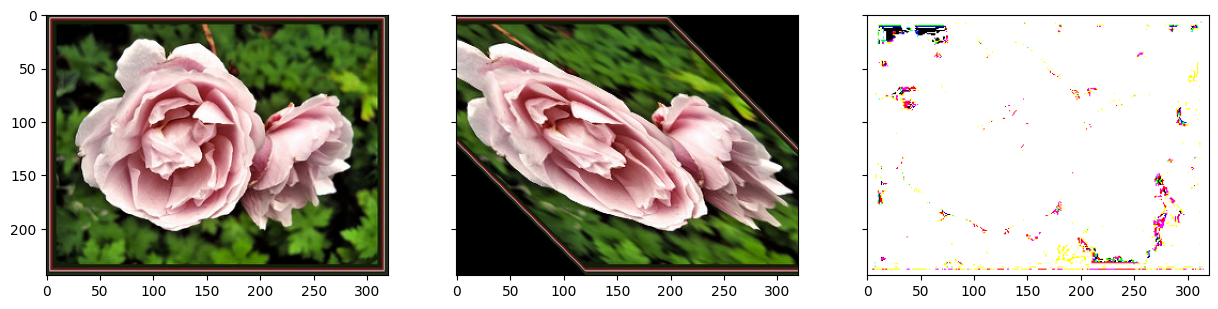

In [ ]:
# shear transforms

shear_transforms = transform.AffineTransform(shear=np.deg2rad(45))
shear_matrix = matrix_to_topleft + shear_transforms + matrix_to_center
shear_image = transform.warp(image, shear_matrix)

bright_jitter = image*0.999 + np.zeros_like(image)*0.001

plot_image([image, shear_image, bright_jitter])

## Practice questions

- Write code to perform a left-right flip, followed by an up-down flip to the same image.
- Normalise the image using 25th and 75th percentiles.
- Perform a 90-degree rotation, and follow it up with a 4x zoom-in.

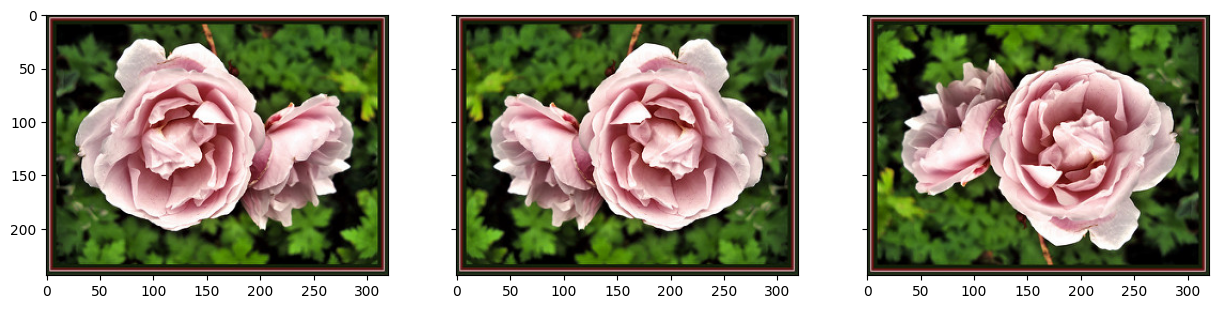

In [ ]:
# Write code to perform a left-right flip, followed by an up-down flip to the same image.

lr_flip = np.fliplr(image)
lr_ud_flip = np.flipud(lr_flip)
plot_image([image, lr_flip, lr_ud_flip])

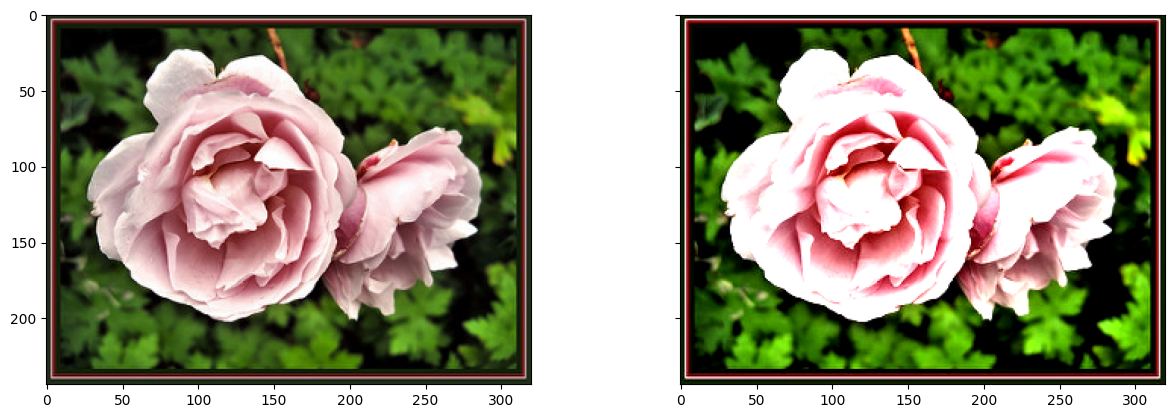

In [ ]:
# Normalise the image using 25th and 75th percentiles.

norm4_image = (image - np.percentile(image, 25)) / (np.percentile(image, 75) - np.percentile(image, 25))
plot_image([image, norm4_image])

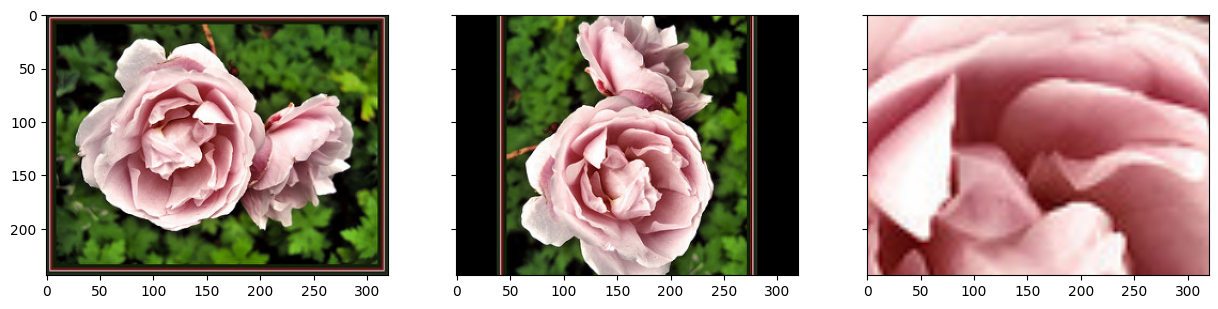

In [ ]:
# Perform a 90-degree rotation, and follow it up with a 4x zoom-in.

rot_90 = transform.rotate(image, 90)
zoom_4x = transform.AffineTransform(scale=(0.25, 0.25))
zoom_4x_mat = matrix_to_topleft + zoom_4x + matrix_to_center
rot_90_4x_zoom = transform.warp(rot_90, zoom_4x_mat)
plot_image([image, rot_90, rot_90_4x_zoom])

## Network building

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('resnet.py','wb').write(src)

Saving resnet.py to resnet.py


9192

In [ ]:
import resnet

# specify image size and channels
img_channels = 3
img_rows = 100
img_cols = 100

# number of classes
nb_classes = 2

In [ ]:
import numpy as np
import tensorflow as tf

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'

    def __init__(self, mode='train', ablation=None, flowers_cls=['daisy', 'rose'],
                 batch_size=32, dim=(100, 100), n_channels=3, shuffle=True):
        """
        Initialise the data generator
        """
        self.dim = dim
        self.batch_size = batch_size
        self.labels = {}
        self.list_IDs = []

        # glob through directory of each class
        for i, cls in enumerate(flowers_cls):
            paths = glob.glob(os.path.join(dir_path, cls, '*'))
            brk_point = int(len(paths)*0.8)
            if mode == 'train':
                paths = paths[:brk_point]
            else:
                paths = paths[brk_point:]
            if ablation is not None:
                paths = paths[:ablation]
            self.list_IDs += paths
            self.labels.update({p:i for p in paths})

        self.n_channels = n_channels
        self.n_classes = len(flowers_cls)
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        delete_rows = []

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            img = io.imread(ID)
            img = img/255
            if img.shape[0] > 100 and img.shape[1] > 100:
                h, w, _ = img.shape
                img = img[int(h/2)-50:int(h/2)+50, int(w/2)-50:int(w/2)+50, : ]
            else:
                delete_rows.append(i)
                continue

            X[i,] = img

            # Store class
            y[i] = self.labels[ID]

        X = np.delete(X, delete_rows, axis=0)
        y = np.delete(y, delete_rows, axis=0)
        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

**Running Ablation Experiments**

Before training the net on the entire dataset, you should always try to first run some experiments to check whether the net is fitting on a small dataset or not.

**Checking that the network is 'working'**

The first part of building a network is to get it to run on your dataset. Let's try fitting the net on only a few images and just one epoch. Note that since `ablation=100` is specified, 100 images of each class are used, so total number of batches is np.floor(200/32) = 6.

Note that the `DataGenerator` class 'inherits' from the `tf.keras.utils.Sequence` class, so it has all the functionalities of the base `tf.keras.utils.Sequence` class (such as the `model.fit_generator` method).

In [ ]:
# using resnet 18
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# create data generator objects in train and val mode
# specify ablation=number of data points to train on
training_generator = DataGenerator('train', ablation=100)
validation_generator = DataGenerator('val', ablation=100)

# fit: this will fit the net on 'ablation' samples, only 1 epoch
model.fit(training_generator, epochs=1, validation_data=validation_generator)

6/6 [==============================] - 48s 8s/step - loss: 1.7288 - accuracy: 0.5183 - val_loss: 4.2972 - val_accuracy: 0.5052


In [ ]:
# using resnet 18
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# create data generator objects in train and val mode
# specify ablation=number of data points to train on
training_generator = DataGenerator('train', ablation=100)
validation_generator = DataGenerator('val', ablation=100)

model.fit(training_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
6/6 [==============================] - 9s 1s/step - loss: 1.6533 - accuracy: 0.5885 - val_loss: 1.6083 - val_accuracy: 0.6510
Epoch 2/20
6/6 [==============================] - 3s 517ms/step - loss: 1.5149 - accuracy: 0.7539 - val_loss: 2.1854 - val_accuracy: 0.5156
Epoch 3/20
6/6 [==============================] - 3s 512ms/step - loss: 1.4600 - accuracy: 0.8063 - val_loss: 2.4196 - val_accuracy: 0.5052
Epoch 4/20
6/6 [==============================] - 3s 523ms/step - loss: 1.4259 - accuracy: 0.7906 - val_loss: 2.2646 - val_accuracy: 0.5312
Epoch 5/20
6/6 [==============================] - 3s 514ms/step - loss: 1.4240 - accuracy: 0.7644 - val_loss: 2.3036 - val_accuracy: 0.5260
Epoch 6/20
6/6 [==============================] - 3s 514ms/step - loss: 1.3890 - accuracy: 0.7801 - val_loss: 2.2242 - val_accuracy: 0.5260
Epoch 7/20
6/6 [==============================] - 3s 509ms/step - loss: 1.3619 - accuracy: 0.7906 - val_loss: 2.0848 - val_accuracy: 0.5312
Epoch 8/20
6/6 [=======

The above model is working and overfitting. To deal with this we will perform the hyper parameter tuning.

## Hyperparameter Tunining

First let's make a list the hyper-parameters we want to tune:

- Learning Rate & Variation + Optimisers
- Augmentation Techniques

The basic idea is to track the validation loss with increasing epochs for various values of a hyperparameter.

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import *

# range of learning rates to tune
hyper_parameters_for_lr = [0.1, 0.01, 0.001]

# callback to append loss
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))

# instantiate a LossHistory() object to store histories
history = LossHistory()
plot_data = {}

# for each hyperparam: train the model and plot loss history
for lr in hyper_parameters_for_lr:
    print ('\n\n'+'=='*20 + '   Checking for LR={}  '.format(lr) + '=='*20 )
    sgd = optimizers.SGD(lr=lr, clipnorm=1.)

    # model and generators
    model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
    model.compile(loss='categorical_crossentropy',optimizer= sgd,
                  metrics=['accuracy'])
    training_generator = DataGenerator('train', ablation=100)
    validation_generator = DataGenerator('val', ablation=100)
    model.fit(training_generator, epochs=3, validation_data=validation_generator, callbacks=[history])

    # plot loss history
    plot_data[lr] = history.losses



========================================   Checking for LR=0.1  ========================================
Epoch 1/3
6/6 [==============================] - 8s 636ms/step - loss: 1.7192 - accuracy: 0.4974 - val_loss: 2.4894 - val_accuracy: 0.5104
Epoch 2/3
6/6 [==============================] - 3s 508ms/step - loss: 1.5374 - accuracy: 0.7016 - val_loss: 3.2610 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 3s 525ms/step - loss: 1.5035 - accuracy: 0.7277 - val_loss: 3.0329 - val_accuracy: 0.5000




========================================   Checking for LR=0.01  ========================================
Epoch 1/3
6/6 [==============================] - 9s 661ms/step - loss: 1.7344 - accuracy: 0.5026 - val_loss: 4.6658 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 3s 518ms/step - loss: 1.5460 - accuracy: 0.6702 - val_loss: 4.5320 - val_accuracy: 0.5052
Epoch 3/3
6/6 [==============================] - 3s 515ms/step - loss: 1.4801 - accuracy: 0.7708 - val_loss: 3.8473 - val_accuracy: 0.4948




========================================   Checking for LR=0.001  ========================================
Epoch 1/3
6/6 [==============================] - 9s 661ms/step - loss: 1.6156 - accuracy: 0.6126 - val_loss: 3.7059 - val_accuracy: 0.4948
Epoch 2/3
6/6 [==============================] - 3s 514ms/step - loss: 1.5202 - accuracy: 0.7173 - val_loss: 3.4861 - val_accuracy: 0.5052
Epoch 3/3
6/6 [==============================] - 3s 513ms/step - loss: 1.4827 - accuracy: 0.7382 - val_loss: 3.2034 - val_accuracy: 0.4948


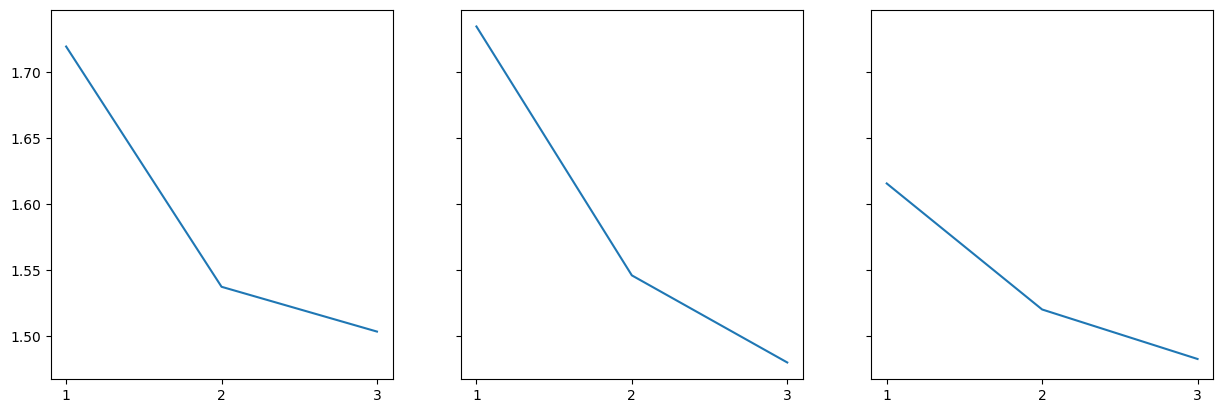

In [ ]:
# plot loss history for each value of hyperparameter
f, axes = plt.subplots(1, 3, sharey=True)
f.set_figwidth(15)

plt.setp(axes, xticks=np.arange(0, len(plot_data[0.01]), 1)+1)

for i, lr in enumerate(plot_data.keys()):
    axes[i].plot(np.arange(len(plot_data[lr]))+1, plot_data[lr])

The results above show that a learning rate of 0.1 is the best, though using such a high learning rate for the entire training is usually not a good idea. Thus, we should use **learning rate decay** - starting from a high learning rate and decaying it with every epoch.

We use another **custom callback** (`DecayLR`) to decay the learning rate at the end of every epoch. The decay rate is specified as 0.5 ^ epoch. Also, note that this time we are telling the model to **use two callbacks** (passed as a list `callbacks=[history, decay]` to `model.fit_generator`).

Although we have used out own custom decay implementation here, you can use the ones built into keras optimisers (using the `decay` argument).

In [ ]:
# learning rate decay
class DecayLR(tf.keras.callbacks.Callback):
    def __init__(self, base_lr=0.001, decay_epoch=1):
        super(DecayLR, self).__init__()
        self.base_lr = base_lr
        self.decay_epoch = decay_epoch
        self.lr_history = []

    # set lr on_train_begin
    def on_train_begin(self, logs={}):
        tf.keras.backend.set_value(self.model.optimizer.lr, self.base_lr)

    # change learning rate at the end of epoch
    def on_epoch_end(self, epoch, logs={}):
        new_lr = self.base_lr * (0.5 ** (epoch // self.decay_epoch))
        self.lr_history.append(tf.keras.backend.get_value(self.model.optimizer.lr))
        tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)

# to store loss history
history = LossHistory()
plot_data = {}

# start with lr=0.1
decay = DecayLR(base_lr=0.1)

# model
sgd = optimizers.SGD()
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.compile(loss='categorical_crossentropy',optimizer= sgd,
              metrics=['accuracy'])
training_generator = DataGenerator('train', ablation=100)
validation_generator = DataGenerator('val', ablation=100)

model.fit(training_generator, epochs=3, validation_data=validation_generator, callbacks=[history, decay])

plot_data[lr] = decay.lr_history

Epoch 1/3
6/6 [==============================] - 7s 647ms/step - loss: 2.0023 - accuracy: 0.6073 - val_loss: 43.6648 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 3s 516ms/step - loss: 1.3604 - accuracy: 0.8063 - val_loss: 11.2936 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 3s 524ms/step - loss: 1.4176 - accuracy: 0.7853 - val_loss: 8.0851 - val_accuracy: 0.5104


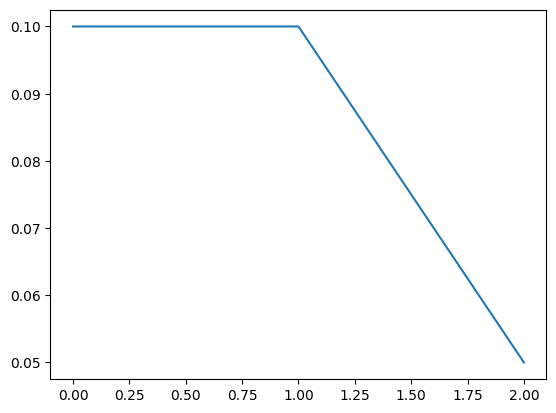

In [ ]:
plt.plot(np.arange(len(decay.lr_history)), decay.lr_history)

## Augmentation Techniques

In [ ]:
# built-in data generation augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
# custom data generation augmentation

import numpy as np
import tensorflow as tf

# data generator with augmentation
class AugmentedDataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, mode='train', ablation=None, flowers_cls=['daisy', 'rose'],
                 batch_size=32, dim=(100, 100), n_channels=3, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = {}
        self.list_IDs = []
        self.mode = mode

        for i, cls in enumerate(flowers_cls):
            paths = glob.glob(os.path.join(dir_path, cls, '*'))
            brk_point = int(len(paths)*0.8)
            if self.mode == 'train':
                paths = paths[:brk_point]
            else:
                paths = paths[brk_point:]
            if ablation is not None:
                paths = paths[:ablation]
            self.list_IDs += paths
            self.labels.update({p:i for p in paths})


        self.n_channels = n_channels
        self.n_classes = len(flowers_cls)
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        delete_rows = []

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            img = io.imread(ID)
            img = img/255
            if img.shape[0] > 100 and img.shape[1] > 100:
                h, w, _ = img.shape
                img = img[int(h/2)-50:int(h/2)+50, int(w/2)-50:int(w/2)+50, : ]
            else:
                delete_rows.append(i)
                continue

            X[i,] = img

            # Store class
            y[i] = self.labels[ID]

        X = np.delete(X, delete_rows, axis=0)
        y = np.delete(y, delete_rows, axis=0)

        # data augmentation
        if self.mode == 'train':
            aug_x = np.stack([datagen.random_transform(img) for img in X])
            X = np.concatenate([X, aug_x])
            y = np.concatenate([y, y])
        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

**Metrics to optimise**

AUC is often a better metric than accuracy. So instead of optimising for accuracy, let's monitor AUC and choose the best model based on AUC on validaton data. We'll use the callbacks on_train_begin and on_epoch_end to initialise (at the start of each epoch) and store the AUC (at the end of epoch).

In [ ]:
from sklearn.metrics import roc_auc_score

class roc_callback(Callback):

    def on_train_begin(self, logs={}):
        logs['val_auc'] = 0

    def on_epoch_end(self, epoch, logs={}):
        y_p = []
        y_v = []
        for i in range(len(validation_generator)):
            x_val, y_val = validation_generator[i]
            y_pred = self.model.predict(x_val)
            y_p.append(y_pred)
            y_v.append(y_val)
        y_p = np.concatenate(y_p)
        y_v = np.concatenate(y_v)
        roc_auc = roc_auc_score(y_v, y_p)
        print ('\nVal AUC for epoch{}: {}'.format(epoch, roc_auc))
        logs['val_auc'] = roc_auc

## Final run

In [ ]:
from keras.callbacks import ModelCheckpoint

# model
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
model.compile(loss='categorical_crossentropy',optimizer= keras.optimizers.SGD(),
              metrics=['accuracy'])
training_generator = AugmentedDataGenerator('train')
validation_generator = AugmentedDataGenerator('val')

# checkpoint
filepath = 'models/best_model.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
auc_logger = roc_callback()

# fit
model.fit(training_generator, epochs=20, validation_data=validation_generator, callbacks=[auc_logger, history, decay, checkpoint])

Epoch 1/20
1/1 [==============================] - 0s 74ms/step

Val AUC for epoch0: 0.7349300193050193

Epoch 1: val_auc improved from -inf to 0.73493, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 25s 580ms/step - loss: 1.6277 - accuracy: 0.7088 - val_loss: 2.8405 - val_accuracy: 0.6181 - val_auc: 0.7349
Epoch 2/20
1/1 [==============================] - 0s 80ms/step

Val AUC for epoch1: 0.8136966481794067

Epoch 2: val_auc improved from 0.73493 to 0.81370, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 552ms/step - loss: 1.4187 - accuracy: 0.7895 - val_loss: 1.7568 - val_accuracy: 0.6979 - val_auc: 0.8137
Epoch 3/20
1/1 [==============================] - 0s 82ms/step

Val AUC for epoch2: 0.8615384615384615

Epoch 3: val_auc improved from 0.81370 to 0.86154, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 556ms/step - loss: 1.3667 - accuracy: 0.8213 - val_loss: 1.4536 - val_accuracy: 0.7500 - val_auc: 0.8615
Epoch 4/20
1/1 [==============================] - 0s 80ms/step

Val AUC for epoch3: 0.8714547559328574

Epoch 4: val_auc improved from 0.86154 to 0.87145, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 22s 553ms/step - loss: 1.3158 - accuracy: 0.8493 - val_loss: 1.4153 - val_accuracy: 0.7812 - val_auc: 0.8715
Epoch 5/20
1/1 [==============================] - 0s 80ms/step

Val AUC for epoch4: 0.8968012737009697

Epoch 5: val_auc improved from 0.87145 to 0.89680, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 561ms/step - loss: 1.3088 - accuracy: 0.8427 - val_loss: 1.4338 - val_accuracy: 0.7396 - val_auc: 0.8968
Epoch 6/20
1/1 [==============================] - 0s 78ms/step

Val AUC for epoch5: 0.9009886665059079

Epoch 6: val_auc improved from 0.89680 to 0.90099, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 22s 547ms/step - loss: 1.2830 - accuracy: 0.8542 - val_loss: 1.3728 - val_accuracy: 0.7951 - val_auc: 0.9010
Epoch 7/20
1/1 [==============================] - 0s 80ms/step

Val AUC for epoch6: 0.9103318541385298

Epoch 7: val_auc improved from 0.90099 to 0.91033, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 561ms/step - loss: 1.2779 - accuracy: 0.8649 - val_loss: 1.3641 - val_accuracy: 0.8090 - val_auc: 0.9103
Epoch 8/20
1/1 [==============================] - 0s 80ms/step

Val AUC for epoch7: 0.9085165895061729

Epoch 8: val_auc did not improve from 0.91033
38/38 [==============================] - 21s 550ms/step - loss: 1.2826 - accuracy: 0.8608 - val_loss: 1.3440 - val_accuracy: 0.8368 - val_auc: 0.9085
Epoch 9/20
1/1 [==============================] - 0s 82ms/step

Val AUC for epoch8: 0.9196911196911196

Epoch 9: val_auc improved from 0.91033 to 0.91969, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 554ms/step - loss: 1.2855 - accuracy: 0.8509 - val_loss: 1.3462 - val_accuracy: 0.8368 - val_auc: 0.9197
Epoch 10/20
1/1 [==============================] - 0s 78ms/step

Val AUC for epoch9: 0.9251218217783567

Epoch 10: val_auc improved from 0.91969 to 0.92512, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 563ms/step - loss: 1.2828 - accuracy: 0.8608 - val_loss: 1.3267 - val_accuracy: 0.8403 - val_auc: 0.9251
Epoch 11/20
1/1 [==============================] - 0s 78ms/step

Val AUC for epoch10: 0.9209917036465367

Epoch 11: val_auc did not improve from 0.92512
38/38 [==============================] - 21s 545ms/step - loss: 1.2837 - accuracy: 0.8616 - val_loss: 1.3117 - val_accuracy: 0.8368 - val_auc: 0.9210
Epoch 12/20
1/1 [==============================] - 0s 75ms/step

Val AUC for epoch11: 0.9186399807089463

Epoch 12: val_auc did not improve from 0.92512
38/38 [==============================] - 20s 536ms/step - loss: 1.2919 - accuracy: 0.8501 - val_loss: 1.3194 - val_accuracy: 0.8368 - val_auc: 0.9186
Epoch 13/20
1/1 [==============================] - 0s 82ms/step

Val AUC for epoch12: 0.9257007767646066

Epoch 13: val_auc improved from 0.92512 to 0.92570, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 548ms/step - loss: 1.2836 - accuracy: 0.8575 - val_loss: 1.3232 - val_accuracy: 0.8438 - val_auc: 0.9257
Epoch 14/20
1/1 [==============================] - 0s 79ms/step

Val AUC for epoch13: 0.9258258982396914

Epoch 14: val_auc improved from 0.92570 to 0.92583, saving model to models/best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - 21s 547ms/step - loss: 1.2971 - accuracy: 0.8439 - val_loss: 1.3035 - val_accuracy: 0.8507 - val_auc: 0.9258
Epoch 15/20
1/1 [==============================] - 0s 77ms/step

Val AUC for epoch14: 0.9189176152807255

Epoch 15: val_auc did not improve from 0.92583
38/38 [==============================] - 21s 540ms/step - loss: 1.2846 - accuracy: 0.8608 - val_loss: 1.3089 - val_accuracy: 0.8611 - val_auc: 0.9189
Epoch 16/20
1/1 [==============================] - 0s 75ms/step

Val AUC for epoch15: 0.9165219907407408

Epoch 16: val_auc did not improve from 0.92583
38/38 [==============================] - 20s 531ms/step - loss: 1.2942 - accuracy: 0.8604 - val_loss: 1.3220 - val_accuracy: 0.8507 - val_auc: 0.9165
Epoch 17/20
1/1 [==============================] - 0s 79ms/step

Val AUC for epoch16: 0.9173860622136485

Epoch 17: val_auc did not improve from 0.92583
38/38 [==============================] - 21s 540ms/step - loss: 1.2891 - accuracy: 0.8546 -

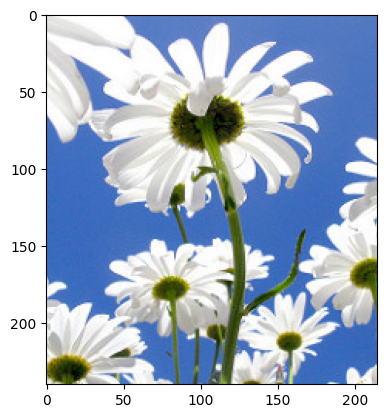

In [ ]:
flower_path = os.path.join(dir_path, flowers_class[0], '*')
flower_path = glob.glob(flower_path)
image = io.imread(flower_path[-8])
plt.imshow(image)
plt.show()

In [ ]:
from keras.models import load_model

h, w, _ = image.shape
img = image[int(h/2)-50:int(h/2)+50, int(w/2)-50:int(w/2)+50, : ]

best_model = load_model(filepath)
best_model.predict(img[np.newaxis,: ])

1/1 [==============================] - 0s 337ms/step


array([[1., 0.]], dtype=float32)